<a href="https://colab.research.google.com/github/tousyou/keras/blob/master/Chart1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf 
from tensorflow.keras import models,layers

COLUMN_NAME_LIST = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']
LABEL_NAME = ['Survived']

dftrain_raw = pd.read_csv('https://raw.githubusercontent.com/tousyou/eat_tensorflow2_in_30_days/master/data/titanic/train.csv')
dftest_raw = pd.read_csv('https://raw.githubusercontent.com/tousyou/eat_tensorflow2_in_30_days/master/data/titanic/test.csv')

dftrain_raw.head(3)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,493,0,1,"Molson, Mr. Harry Markland",male,55.0,0,0,113787,30.5000,C30,S
1,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
2,388,1,2,"Buss, Miss. Kate",female,36.0,0,0,27849,13.0000,NaN,S


In [76]:
pd.unique(dftrain_raw['Embarked'])


array(['S', 'C', 'Q', nan], dtype=object)

In [81]:
dftrain_raw.groupby(by='Cabin').count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
Cabin,,,,,,,,,,,
A10,1,1,1,1,1,1,1,1,1,1,1
A14,1,1,1,1,1,0,1,1,1,1,1
A16,1,1,1,1,1,1,1,1,1,1,1
A19,1,1,1,1,1,0,1,1,1,1,1
A20,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
F2,2,2,2,2,2,2,2,2,2,2,2
F33,3,3,3,3,3,3,3,3,3,3,3
F4,1,1,1,1,1,1,1,1,1,1,1


In [78]:
dftrain_raw.groupby(by='Embarked')['Sex'].size().reset_index(name='Size')

,Embarked,Size
0,C,131
1,Q,62
2,S,517


In [4]:
def preprocessing(dfdata):

    dfresult= pd.DataFrame()

    #Pclass
    dfPclass = pd.get_dummies(dfdata['Pclass'])
    dfPclass.columns = ['Pclass_' +str(x) for x in dfPclass.columns ]
    dfresult = pd.concat([dfresult,dfPclass],axis = 1)
    
    #Sex
    dfSex = pd.get_dummies(dfdata['Sex'])
    dfresult = pd.concat([dfresult,dfSex],axis = 1)

    #Age
    dfresult['Age'] = dfdata['Age'].fillna(0)
    dfresult['Age_null'] = pd.isna(dfdata['Age']).astype('int32')

    #SibSp,Parch,Fare
    dfresult['SibSp'] = dfdata['SibSp']
    dfresult['Parch'] = dfdata['Parch']
    dfresult['Fare'] = dfdata['Fare']

    #Carbin
    dfresult['Cabin_null'] =  pd.isna(dfdata['Cabin']).astype('int32')
    #dfCabin = pd.get_dummies(dfdata['Cabin'],dummy_na=True)
    #dfCabin.columns = ['Cabin_' + str(x) for x in dfCabin.columns]
    #dfresult = pd.concat([dfresult,dfCabin],axis=1)

    #Embarked
    dfEmbarked = pd.get_dummies(dfdata['Embarked'],dummy_na=True)
    dfEmbarked.columns = ['Embarked_' + str(x) for x in dfEmbarked.columns]
    dfresult = pd.concat([dfresult,dfEmbarked],axis = 1)

    return(dfresult)

In [5]:
x_train = preprocessing(dftrain_raw)
y_train = dftrain_raw['Survived'].values

x_test = preprocessing(dftest_raw)
y_test = dftest_raw['Survived'].values

print("x_train.shape =", x_train.shape )
print("x_test.shape =", x_test.shape )

x_train.shape = (712, 15)
x_test.shape = (179, 15)


In [53]:
tf.keras.backend.clear_session()

model = models.Sequential()
model.add(layers.Dense(1,activation = 'sigmoid',input_shape=(15,)))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 16        
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________


In [54]:
# Use binary cross entropy loss function for binary classification
model.compile(
            optimizer='Nadam',
#            optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
            loss='binary_crossentropy',
            metrics=['AUC'])

history = model.fit(x_train,y_train,
                    batch_size= 64,
                    epochs= 100,
                    validation_split=0.2 #Split part of the training data for validation
                   )

Epoch 1/100
9/9 [==============================] - 0s 32ms/step - loss: 7.4094 - auc: 0.4767 - val_loss: 7.4500 - val_auc: 0.4559
Epoch 2/100
9/9 [==============================] - 0s 3ms/step - loss: 7.1951 - auc: 0.4760 - val_loss: 7.2047 - val_auc: 0.4510
Epoch 3/100
9/9 [==============================] - 0s 3ms/step - loss: 6.9592 - auc: 0.4803 - val_loss: 6.9442 - val_auc: 0.4502
Epoch 4/100
9/9 [==============================] - 0s 3ms/step - loss: 6.7081 - auc: 0.4814 - val_loss: 6.6793 - val_auc: 0.4567
Epoch 5/100
9/9 [==============================] - 0s 3ms/step - loss: 6.4604 - auc: 0.4828 - val_loss: 6.4132 - val_auc: 0.4550
Epoch 6/100
9/9 [==============================] - 0s 3ms/step - loss: 6.2147 - auc: 0.4849 - val_loss: 6.1492 - val_auc: 0.4542
Epoch 7/100
9/9 [==============================] - 0s 3ms/step - loss: 5.9702 - auc: 0.4864 - val_loss: 5.8900 - val_auc: 0.4531
Epoch 8/100
9/9 [==============================] - 0s 3ms/step - loss: 5.7156 - auc: 0.4886 - va

In [30]:
import matplotlib.pyplot as plt

def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'bo--')
    plt.plot(epochs, val_metrics, 'ro-')
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

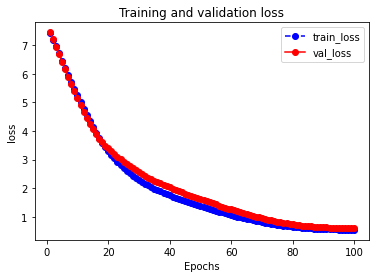

In [55]:
plot_metric(history,"loss")

In [56]:
#Predict the possiblities
model.predict(x_test[0:10])
#model(tf.constant(x_test[0:10].values,dtype = tf.float32)) #Identical way

array([[0.649988  ],
       [0.35005927],
       [0.52435285],
       [0.9655341 ],
       [0.68999076],
       [0.5508632 ],
       [0.5203087 ],
       [0.85558766],
       [0.6771834 ],
       [0.20703566]], dtype=float32)

In [61]:
model.evaluate(x_test,y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.5509 - auc: 0.7536


[0.5508809089660645, 0.7536261677742004]

In [57]:
#Predict the classes
model.predict_classes(x_test[0:10])

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([[1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0]], dtype=int32)

In [58]:
y_test[0:10]


array([0, 0, 0, 1, 1, 1, 0, 1, 1, 0])

In [60]:
m = tf.keras.metrics.AUC(num_thresholds=3)
m.update_state(y_test[0:10],model.predict_classes(x_test[0:10]))
m.result().numpy()

0.7

In [63]:
# Saving model structure and parameters

model.save('./keras_model.h5')  

del model  #Deleting current model

# Identical to the previous one
model = models.load_model('./keras_model.h5')
model.evaluate(x_test,y_test)


6/6 [==============================] - 0s 2ms/step - loss: 0.5509 - auc_2: 0.7536


[0.5508809089660645, 0.7536261677742004]

In [64]:
# Saving the weights, this way only save the tensors of the weights
model.save_weights('./tf_model_weights.ckpt',save_format = "tf")
# Saving model structure and parameters to a file, so the model allows cross-platform deployment

model.save('./tf_model_savedmodel', save_format="tf")
print('export saved model.')

model_loaded = tf.keras.models.load_model('./tf_model_savedmodel')
model_loaded.evaluate(x_test,y_test)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ./tf_model_savedmodel/assets
export saved model.
6/6 [==============================] - 0s 2ms/step - loss: 0.5509 - auc_2: 0.7536


[0.5508809089660645, 0.7536261677742004]

In [66]:
# Saving the model structure
json_str = model.to_json()

# Retrieving the model structure
model_json = models.model_from_json(json_str)
# Saving the weights of the model
model.save_weights('./keras_model_weight.h5')

# Retrieving the model structure
model_json = models.model_from_json(json_str)
model_json.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['AUC']
    )

# Load the weights
model_json.load_weights('./keras_model_weight.h5')
model_json.evaluate(x_test,y_test)

6/6 [==============================] - 0s 1ms/step - loss: 0.5509 - auc: 0.7536


[0.5508809089660645, 0.7536261677742004]